In [53]:
import tomso as tomso
from tomso import gyre
import mesa_reader as mr
import numpy as np
import matplotlib.pyplot as plt
import glob

# set some global options
plt.rcParams['figure.figsize'] = (12,10)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 20
Lsun = 3.9e33

In [117]:
def inspect_mode(filename):
    #filename='summary.txt'
    header, data = tomso.gyre.load_summary(filename)
    plt.plot(data['x'],data['dW_dx'])
    plt.xlabel(r'$x$ = r / R$_{\odot}$')
    plt.ylabel(r'd$W$ / d$x$')
    print('Frequency (muHz): ', header['Refreq'])
    print('Growth rate: ',header['eta'])

def inspect_modes(filename):
    #filename='summary.txt'
    alpha=0.8
    linestyle=':'
    header, data = tomso.gyre.load_summary(filename)
    

    f, axarr = plt.subplots(2, 2, sharex=True)
    f.subplots_adjust(hspace=0)
    f.subplots_adjust(wspace=0.1)
    
    frequency= str("{0:.3f}".format(header['Refreq']))
    H = str("{:.2e}".format(header['H']))
    eta = str("{0:.3f}".format(header['eta']))
    np = str(int(header['n_p']))
    ng = str(int(header['n_g']))
    ell = str(int(header['l']))

    axarr[0, 0].plot(data['x'],data['dW_dx'])
    axarr[0, 0].set_title('Differential Work and Inertia')
    
    
    axarr[0, 0].annotate(r'$\nu$ = '+frequency+r'$\mu$Hz', xy=(0.10, 0.48),xycoords='axes fraction')
    axarr[0, 0].annotate(r'$\eta$ = '+eta, xy=(0.10, 0.40),xycoords='axes fraction')
    axarr[0, 0].annotate(r'$\ell$ = '+ell, xy=(0.10, 0.32),xycoords='axes fraction')
    axarr[0, 0].annotate(r'n$_p$ = '+np, xy=(0.10, 0.24),xycoords='axes fraction')
    axarr[0, 0].annotate(r'n$_g$ = '+ng, xy=(0.10, 0.16),xycoords='axes fraction')
    axarr[0, 0].annotate(r'H = '+H, xy=(0.10, 0.08),xycoords='axes fraction')
    axarr[0, 0].set_ylabel(r'd$W$ / d$x$')

    axarr[0, 1].plot(data['x'],data['Rexi_r'],label=' Real',alpha=1.0)
    axarr[0, 1].plot(data['x'],data['Imxi_r'],label=' Imaginary',alpha=alpha,linestyle=linestyle)
    axarr[0, 1].set_title(r'Eigenfunctions')
    axarr[0, 1].yaxis.set_label_position("right")
    axarr[0, 1].yaxis.tick_right()
    axarr[0, 1].set_ylabel(r'$\xi_{r}$')
    axarr[0, 1].legend(loc='lower left')    

    
    axarr[1, 0].plot(data['x'],data['dE_dx'])
    axarr[1, 0].set_xlabel(r'$x$ = r / R$_{\odot}$')
    axarr[1, 0].set_ylabel(r'd$E$ / d$x$')
    #axarr[1, 0].set_title('Differential Inertia')    
    
    axarr[1, 1].plot(data['x'],data['Rexi_h'],label=' Real',alpha=1.0)
    axarr[1, 1].plot(data['x'],data['Imxi_h'],label=' Imaginary',alpha=alpha,linestyle=linestyle)
    axarr[1, 1].set_xlabel(r'$x$ = r / R$_{\odot}$')
    axarr[1, 1].yaxis.set_label_position("right")
    axarr[1, 1].yaxis.tick_right()
    axarr[1, 1].set_ylabel(r'$\xi_{h}$')
    

## Running GYRE calculations using a 10Msun MESA model
Here's the gyre.in file: 

```
&constants
/

&model
        model_type = 'EVOL'
        !file = 'spb.mesa'
        file = '10/LOGS/profile2.data.GYRE'
        file_format = 'MESA'
/

&mode
        l = 1
        tag = 'l=1'
/

&mode
        l = 2
        tag = 'l=2'
/

&osc
        nonadiabatic = .TRUE.
/

&num
        diff_scheme = 'COLLOC_GL2' ! MAGNUS_GL2
/

&scan
        grid_type = 'INVERSE'
        freq_min_units = 'UHZ'
        freq_max_units = 'UHZ'
        freq_min = 0.05
        freq_max = 10
        n_freq = 100
        tag_list = 'l=1'
/

&scan
        grid_type = 'INVERSE'
        freq_min_units = 'UHZ'
        freq_max_units = 'UHZ'
        freq_min = 0.05
        freq_max = 10
        n_freq = 100
        tag_list = 'l=2'
/


&grid
        n_inner = 5
        alpha_osc = 10
        alpha_exp = 2
/

&ad_output
/

&nad_output
        summary_file = '10_XC_068_summary.txt'
        summary_file_format = 'TXT'
        summary_item_list = 'j,l,n_pg,n_p,n_g,eta,omega,H'
        mode_file_format = 'TXT'
        mode_template = '10_XC_068_mode.%J.txt'
        mode_item_list = 'j,l,n_pg,n_p,n_g,eta,freq,x,f_T,xi_r,xi_h,dW_dx,dE_dx,H,L_star,T,M_r,rho,P,prop_type'
/
```


The search is between 0.05 and 10 $\mu$Hz. We're looking at $\ell$=1,2,3
## $\ell = 1$ Mode with largest total energy H

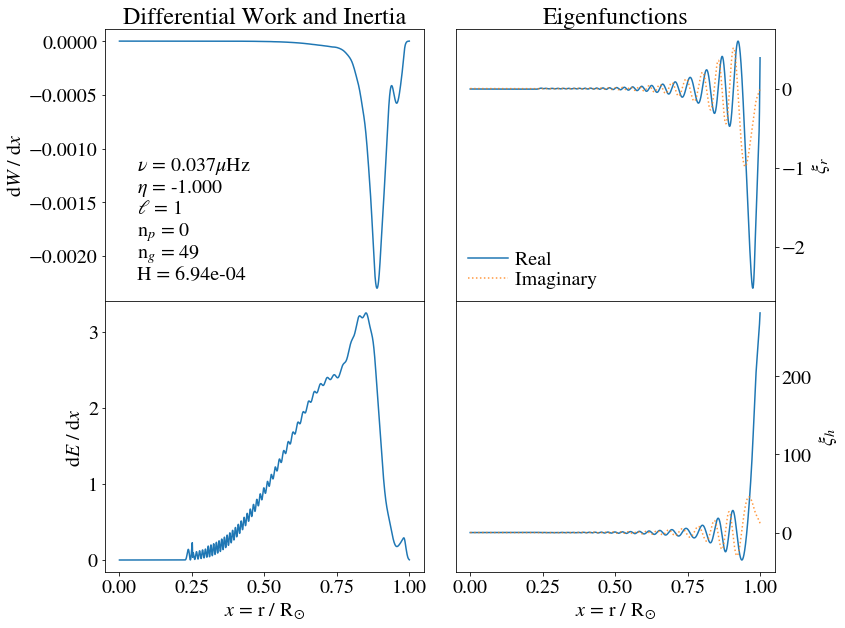

In [127]:
inspect_modes('10_XC_068_mode.00046.txt')

## $\ell = 2$ Mode with largest total energy H

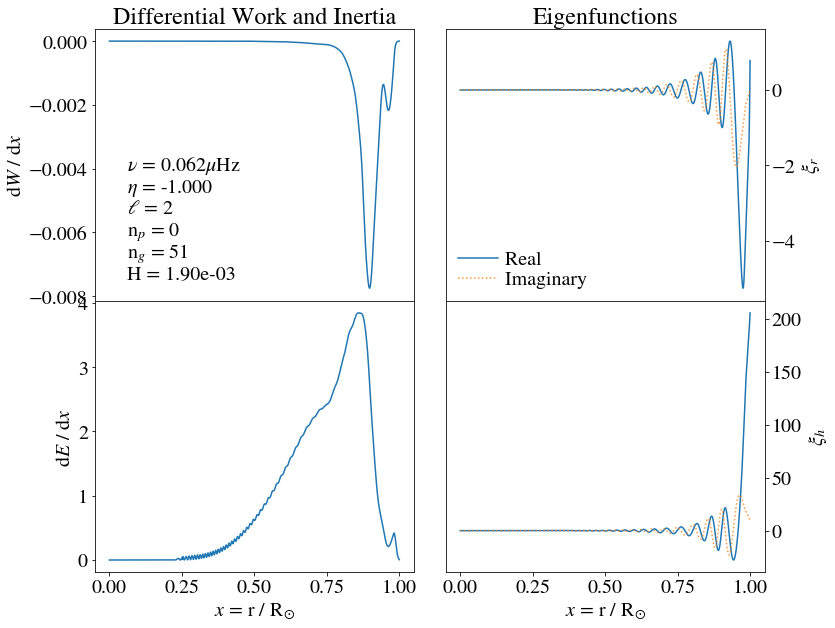

In [128]:
inspect_modes('10_XC_068_mode.00095.txt')

## $\ell = 3$ Mode with largest total energy H

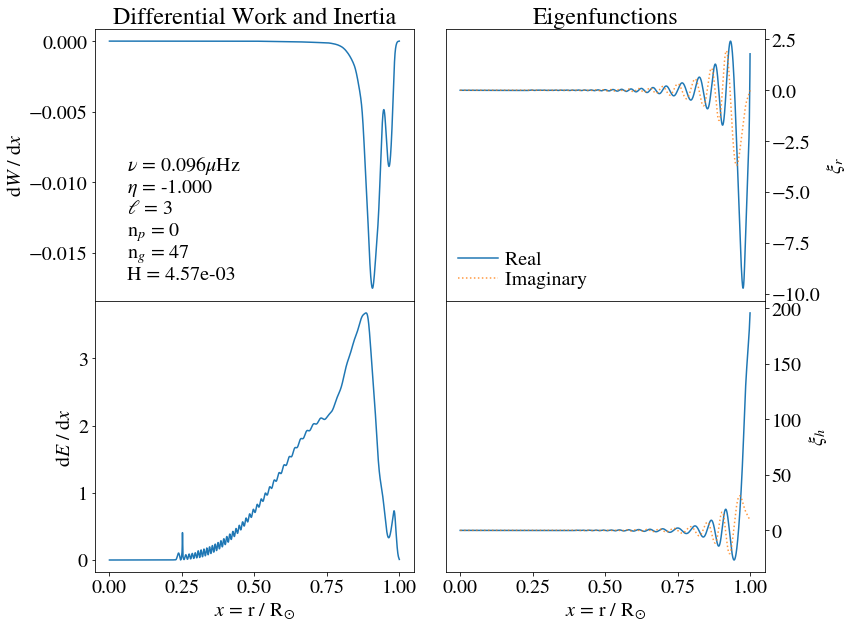

In [130]:
inspect_modes('10_XC_068_mode.00139.txt')

## What is this?? 
Has both p and g properties in the envelope... confined in the region where dissipation occurs. 

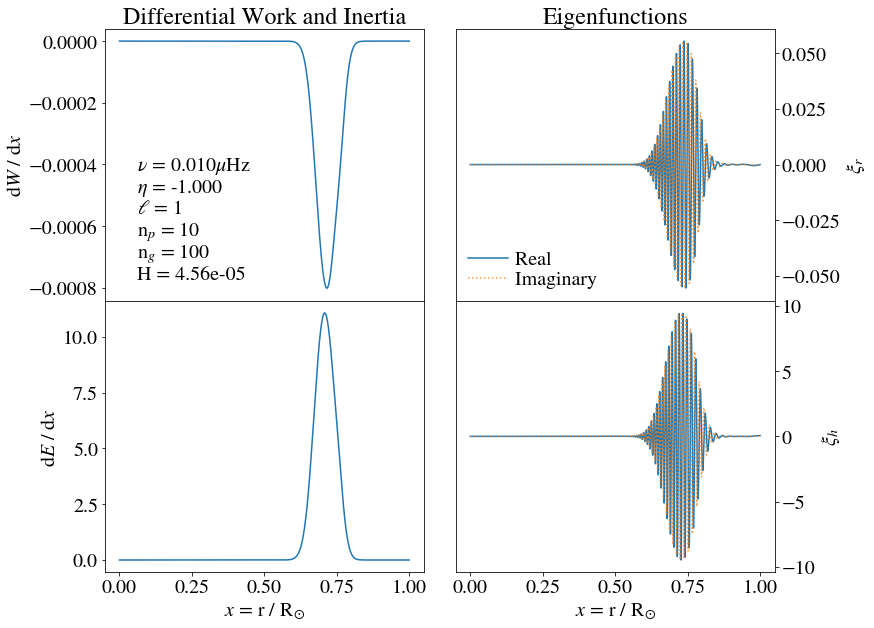

In [133]:
inspect_modes('10_XC_068_mode.00041.txt')

## This is doing a finer search between 5 and 10 $\mu$Hz
What puzzles me is that the frequencies that GYRE finds are not within the search frequency range

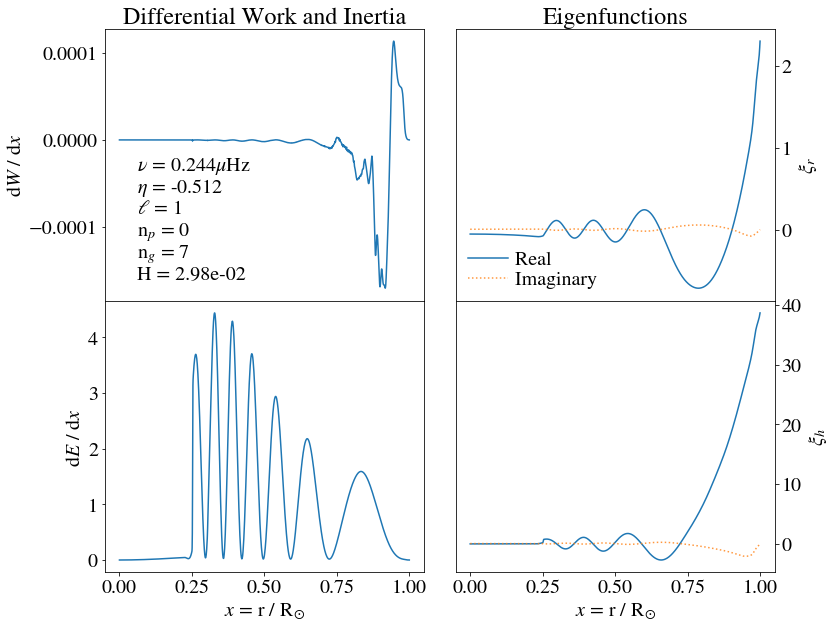

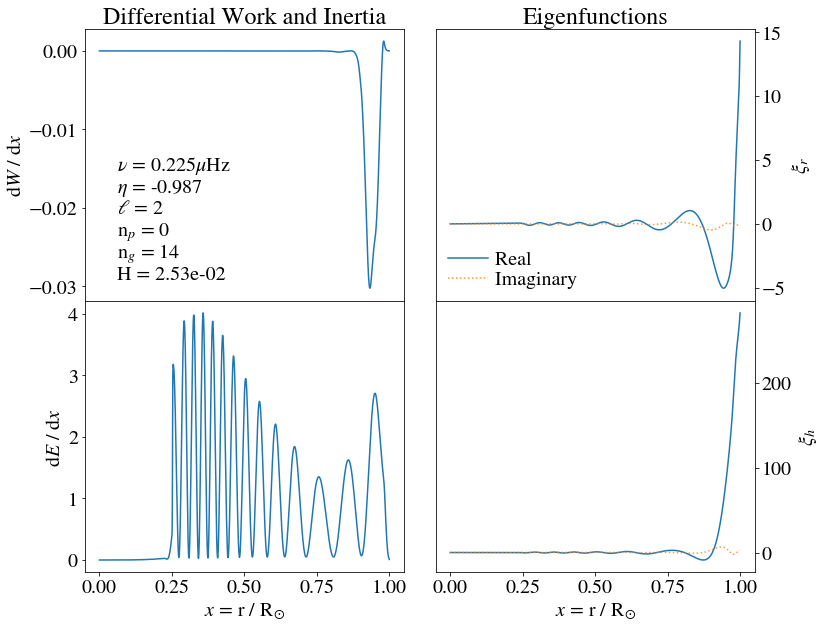

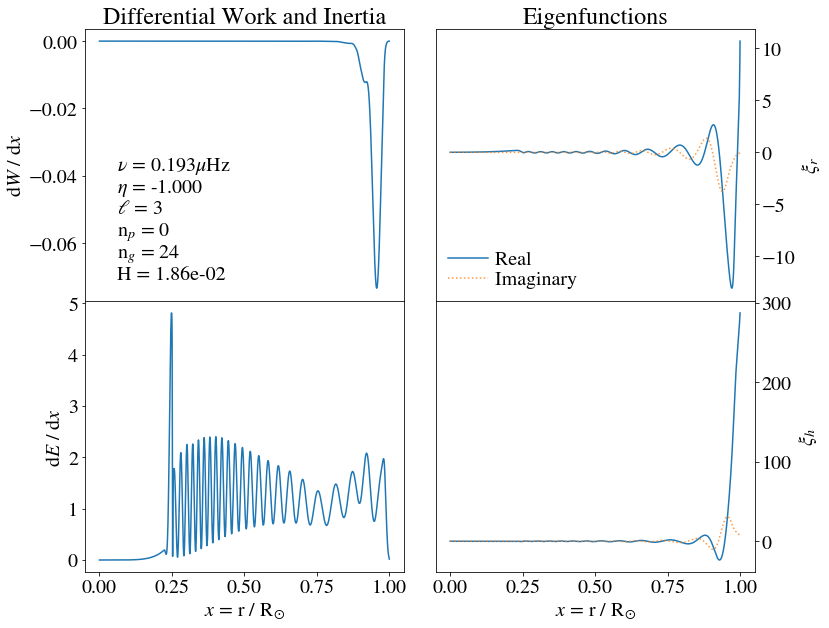

In [135]:
inspect_modes('10_XC_068_mode_b.00008.txt')
inspect_modes('10_XC_068_mode_b.00012.txt')
inspect_modes('10_XC_068_mode_b.00014.txt')

# Below I was just playing with SPB stars...


In [121]:
filename='summary.txt'
header, data = tomso.gyre.load_summary(filename)

data['H']
data['l']
data['eta']
data['n_g']

print(data[:][0])


(1., -76., 0., 76., -0.99986488, 0.06671942, -0.00027832, 0.00222574)


//anaconda/lib/python3.5/site-packages/tomso/gyre.py:41: UserWarning: genfromtxt: Empty input file: "[b'\n', b'\n']"
  header = np.genfromtxt(lines[2:4], names=True)


In [4]:
filename='mode.00001.txt'
header, data = tomso.gyre.load_mode(filename)
print('Stellar Luminosity: ',header['L_star']/Lsun)


Stellar Luminosity:  889.3801290427821


Frequency (muHz):  0.06671942021592256
Growth rate:  -0.9998648813569739


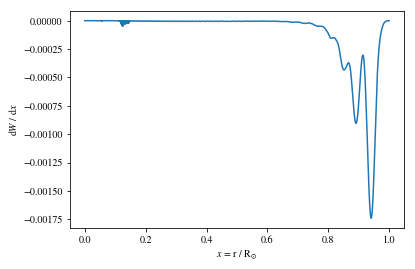

In [5]:
# Keys for the data arrays are: l,n_pg,n_p,n_g,eta,x,f_T,xi_r,xi_h,dW_dx
plt.plot(data['x'],data['dW_dx'])
plt.xlabel(r'$x$ = r / R$_{\odot}$')
plt.ylabel(r'd$W$ / d$x$')
print('Frequency (muHz): ', header['Refreq'])
print('Growth rate: ',header['eta'])

Text(0,0.5,'$\\xi_{r}$')

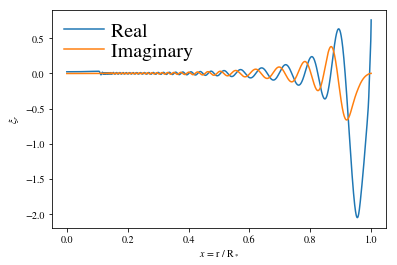

In [6]:
plt.plot(data['x'],data['Rexi_r'],label=' Real')
plt.plot(data['x'],data['Imxi_r'],label=' Imaginary')
legend = plt.legend(loc='upper left')    
#plt.plot(data['x'],data['Rexi_h'])
plt.xlabel(r'$x$ = r / R$_*$')
plt.ylabel(r'$\xi_{r}$')


Text(0,0.5,'$\\xi_{h}$')

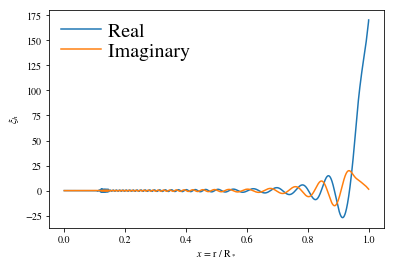

In [7]:
plt.plot(data['x'],data['Rexi_h'],label=' Real')
plt.plot(data['x'],data['Imxi_h'],label=' Imaginary')
legend = plt.legend(loc='upper left')    

#plt.plot(data['x'],data['Rexi_h'])
plt.xlabel(r'$x$ = r / R$_*$')
plt.ylabel(r'$\xi_{h}$')

Text(0,0.5,'d$\\epsilon$ / d$x$ (MR$^2$)')

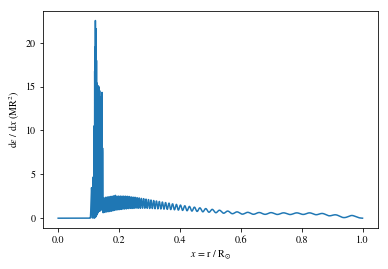

In [8]:
plt.plot(data['x'],data['dE_dx'])
plt.xlabel(r'$x$ = r / R$_{\odot}$')
plt.ylabel(r'd$\epsilon$ / d$x$ (MR$^2$)')

Text(0,0.5,'$\\log $T')

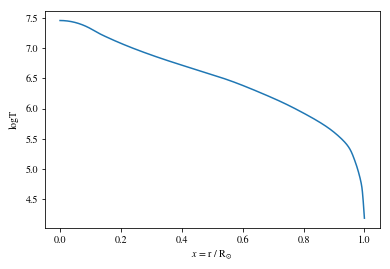

In [9]:
plt.plot(data['x'],np.log10(data['T']))
plt.xlabel(r'$x$ = r / R$_{\odot}$')
plt.ylabel(r'$\log $T')

## Let's look at the MESA 10M model

We are looking at X$_c$=[0.68,0.33,0.01]
Let's start with the ZAMS

In [19]:
filename='10_XC_068_mode.00010.txt'
filename='10_XC_068_mode.00006.txt'

header, data = tomso.gyre.load_mode(filename)
print('Stellar Luminosity: ',header['L_star']/Lsun)

Stellar Luminosity:  5720.617531897785


Frequency (muHz):  0.008214733425117325
Growth rate:  -0.9999820499747216
l:  1.0
n_g:  186.0


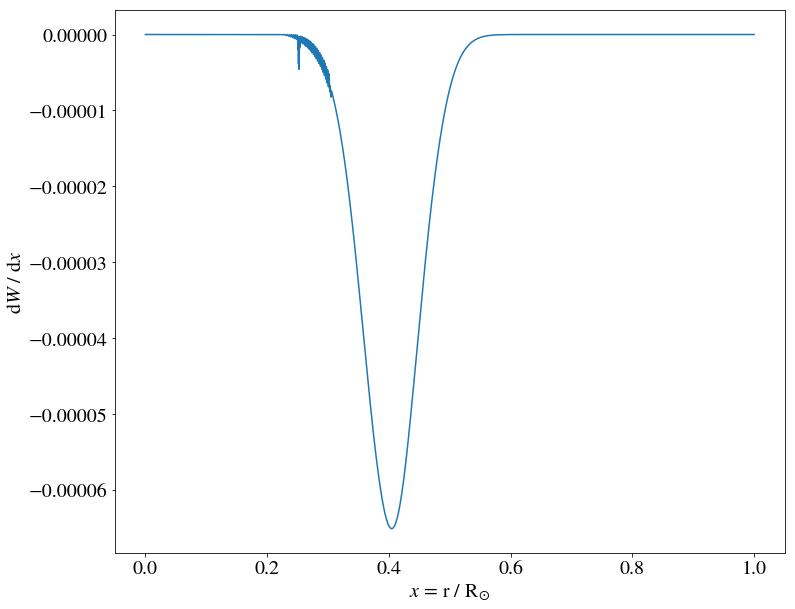

In [20]:
plt.plot(data['x'],data['dW_dx'])
plt.xlabel(r'$x$ = r / R$_{\odot}$')
plt.ylabel(r'd$W$ / d$x$')
print('Frequency (muHz): ', header['Refreq'])
print('Growth rate: ',header['eta'])
print('l: ',header['l'])
print('n_g: ',header['n_g'])

Text(0,0.5,'$\\xi_{h}$')

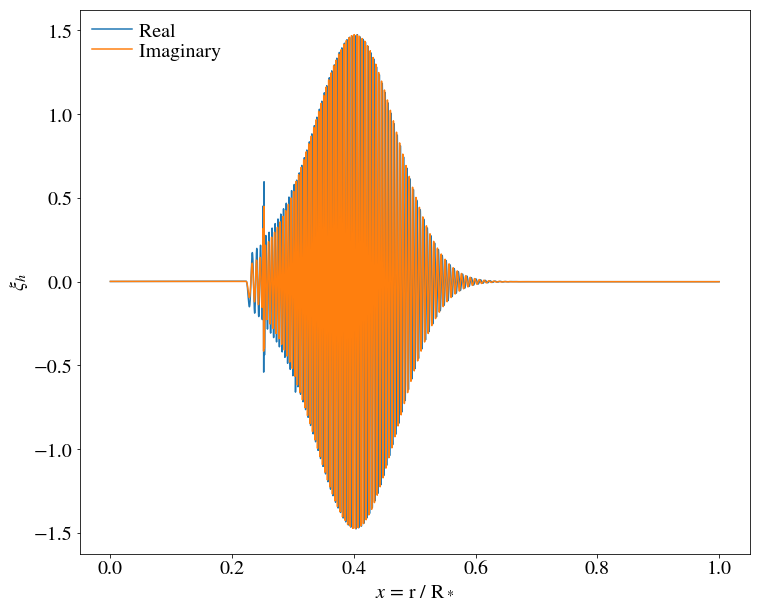

In [21]:
plt.plot(data['x'],data['Rexi_h'],label=' Real')
plt.plot(data['x'],data['Imxi_h'],label=' Imaginary')
legend = plt.legend(loc='upper left')    

#plt.plot(data['x'],data['Rexi_h'])
plt.xlabel(r'$x$ = r / R$_*$')
plt.ylabel(r'$\xi_{h}$')

Text(0,0.5,'$\\xi_{r}$')

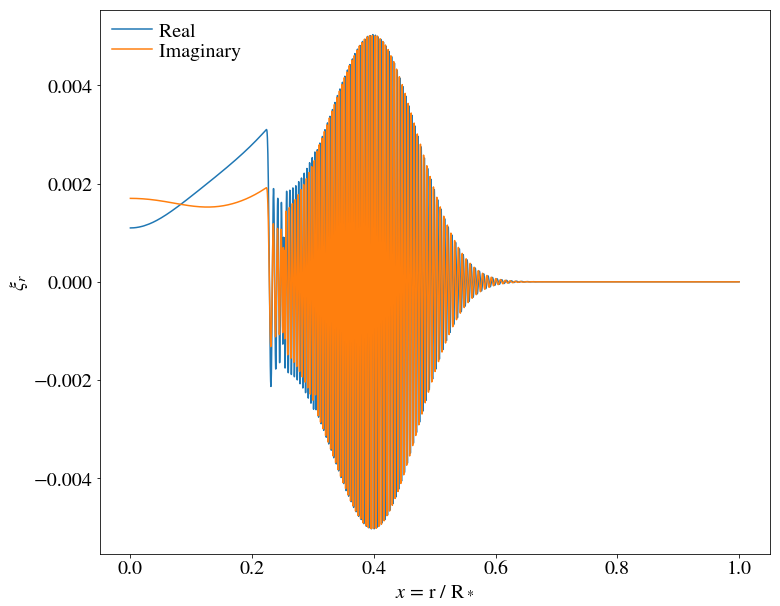

In [22]:
plt.plot(data['x'],data['Rexi_r'],label=' Real')
plt.plot(data['x'],data['Imxi_r'],label=' Imaginary')
legend = plt.legend(loc='upper left')    

#plt.plot(data['x'],data['Rexi_h'])
plt.xlabel(r'$x$ = r / R$_*$')
plt.ylabel(r'$\xi_{r}$')

Text(0,0.5,'d$\\epsilon$ / d$x$ (MR$^2$)')

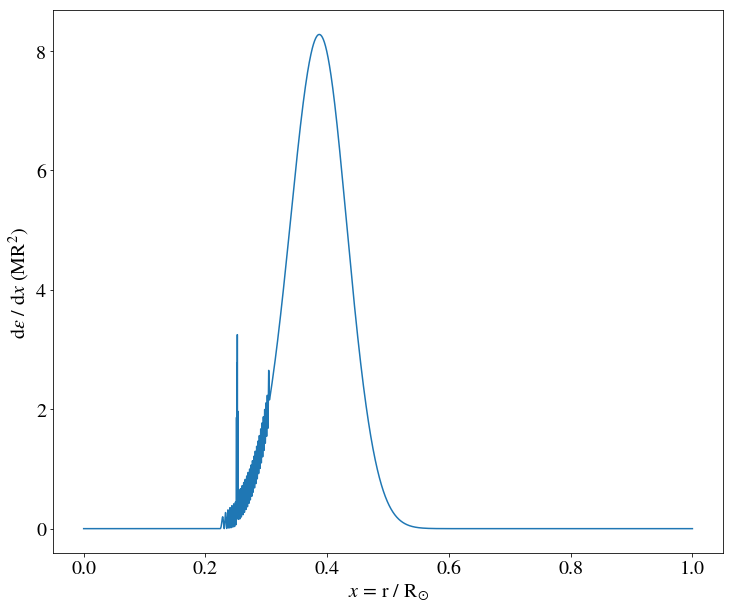

In [23]:
plt.plot(data['x'],data['dE_dx'])
plt.xlabel(r'$x$ = r / R$_{\odot}$')
plt.ylabel(r'd$\epsilon$ / d$x$ (MR$^2$)')


In [24]:
mods = ['10_XC_068_mode.00002.txt','10_XC_068_mode.00003.txt','10_XC_068_mode.00004.txt','10_XC_068_mode.00005.txt','10_XC_068_mode.00006.txt','10_XC_068_mode.00008.txt','10_XC_068_mode.00009.txt','10_XC_068_mode.00010.txt']
for mod in mods:
    header, data = tomso.gyre.load_mode(mod)
    print(' Frequency (muHz): ', header['Refreq'],' l: ',header['l'], 'n_p: ',header['n_p'],' n_g: ',header['n_g'],' Growth rate: ',header['eta'])
plt.plot(data['x'],data['Rexi_h'])    
    
    

 Frequency (muHz):  0.003004484830486622  l:  1.0 n_p:  18.0  n_g:  218.0  Growth rate:  -0.9999999999964951
 Frequency (muHz):  0.003262910210118486  l:  1.0 n_p:  19.0  n_g:  170.0  Growth rate:  -0.9998462339075332
 Frequency (muHz):  0.004269291961969528  l:  1.0 n_p:  12.0  n_g:  195.0  Growth rate:  -0.9999981468649
 Frequency (muHz):  0.004481826133532559  l:  1.0 n_p:  14.0  n_g:  191.0  Growth rate:  -0.9999945151742815
 Frequency (muHz):  0.008214733425117325  l:  1.0 n_p:  4.0  n_g:  186.0  Growth rate:  -0.9999820499747216
 Frequency (muHz):  0.02239591907396196  l:  1.0 n_p:  0.0  n_g:  80.0  Growth rate:  -0.9999999383925571
 Frequency (muHz):  0.04225744357520077  l:  1.0 n_p:  0.0  n_g:  43.0  Growth rate:  -0.9999997281750252


FileNotFoundError: [Errno 2] No such file or directory: '10_XC_068_mode.00010.txt'

In [25]:
list=glob.glob("10_XC_068_mode*.txt")
for mod in list:
    header, data = tomso.gyre.load_mode(mod)
    print('Frequency (muHz): ', header['Refreq'],' l: ',header['l'],' n_p: ',header['n_p'],' n_g: ',header['n_g'],' Growth rate: ',header['eta'],mod)
    
    

Frequency (muHz):  0.004396552771266691  l:  2.0  n_p:  0.0  n_g:  125.0  Growth rate:  -0.999928371769537 10_XC_068_mode.00012.txt
Frequency (muHz):  0.008214733425117325  l:  1.0  n_p:  4.0  n_g:  186.0  Growth rate:  -0.9999820499747216 10_XC_068_mode.00006.txt
Frequency (muHz):  0.01537375439389192  l:  1.0  n_p:  0.0  n_g:  114.0  Growth rate:  -0.999999995295244 10_XC_068_mode.00007.txt
Frequency (muHz):  0.004978622932017048  l:  2.0  n_p:  0.0  n_g:  141.0  Growth rate:  -0.9999606312909194 10_XC_068_mode.00013.txt
Frequency (muHz):  0.004481826133532559  l:  1.0  n_p:  14.0  n_g:  191.0  Growth rate:  -0.9999945151742815 10_XC_068_mode.00005.txt
Frequency (muHz):  0.003260017737786535  l:  2.0  n_p:  0.0  n_g:  105.0  Growth rate:  -0.9999614791767221 10_XC_068_mode.00011.txt
Frequency (muHz):  0.004269291961969528  l:  1.0  n_p:  12.0  n_g:  195.0  Growth rate:  -0.9999981468649 10_XC_068_mode.00004.txt
Frequency (muHz):  0.005140713092675115  l:  2.0  n_p:  0.0  n_g:  146.0 

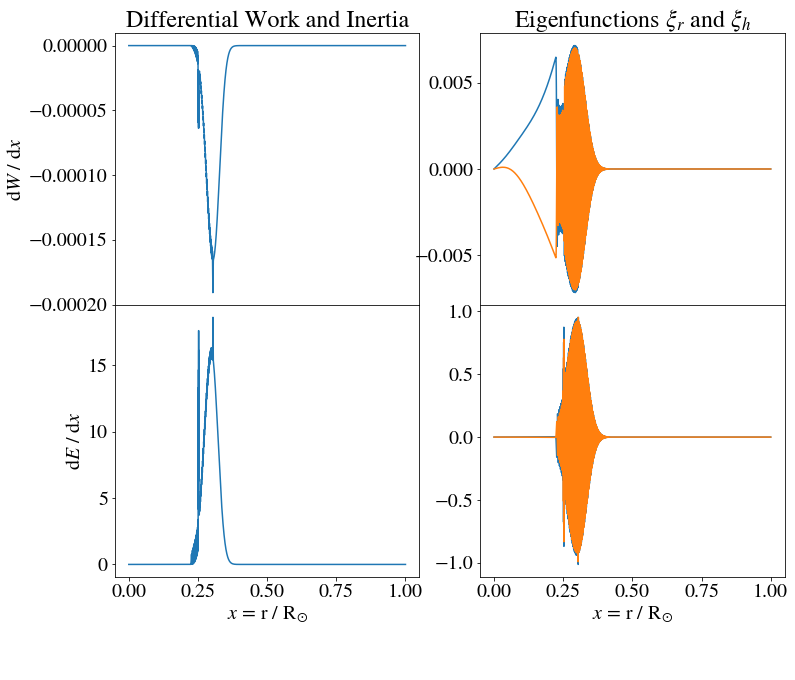

In [27]:
inspect_modes('10_XC_068_mode.00016.txt')

In [ ]:
10_XC_068_mode.00002.txt